# 2020 'What Could Have Been' All-Stars 

The goal of this project is to predict which pitching metrics are most important in classifying All-Star bids for MLB starting pitchers and craft a hypothetical All-Star lineup of pitchers based on those metrics. 

First, I import some necessary packages and read in the data as a csv file.

In [1]:
import numpy as np
import pandas as pd

pitching = pd.read_csv('./Data/Pitching.csv')

This data set includes statistics from 1871 to 2012, however, for the purposes of this project I analyze data from the 1987 season to the 2012 season. This is to make the data more manageable; 1987 was chosen as a cut-off due to the league-wide increase in offensive production beginning that season. Furthermore, only starting pitchers who started more than 25 games will be considered, such that relief pitchers and starters with very few outings are eliminated from analysis. I also introduce other statistics, such as WHIP and K%, to the data set. Lastly, I drop columns featuring irrelevant data in relation to the project. Some examples include League, Balks, and Saves (since I am only considering starters), as well as columns with missing data, such as Opponent Batting Average and Sacrifice Flies. 

In [2]:
pitching = pitching[ (pitching['yearID'] >= 1987) & (pitching['yearID'] <= 2012)]
pitching = pitching[ pitching['GS'] > 25 ]
pitching['IP'] = pitching['IPouts'] / 3
pitching['WHIP'] = (pitching['H'] + pitching['BB']) / pitching['IP']
pitching['K%'] = pitching['SO'] / pitching['BFP']
pitching['BB%'] = pitching['BB'] / pitching['BFP']
pitching['K%-BB%'] = pitching['K%'] - pitching['BB%']

pitching = pitching.drop(['IPouts', 'stint', 'teamID', 'lgID', 'GS', 'SV', 'IBB', 'WP', 'HBP', 'BK', 'GF', 'SH', 'SF', 'GIDP', 'BAOpp'], axis = 1)

pitching.head()

,playerID,yearID,W,L,G,CG,SHO,H,ER,HR,BB,SO,ERA,BFP,R,IP,WHIP,K%,BB%,K%-BB%
43,abbotji01,1989,12,12,29,4,2,190,79,13,74,115,3.92,788.0,95,181.333333,1.455882,0.145939,0.093909,0.052030
44,abbotji01,1990,10,14,33,4,1,246,106,16,72,105,4.51,925.0,116,211.666667,1.502362,0.113514,0.077838,0.035676
45,abbotji01,1991,18,11,34,5,1,222,78,14,73,158,2.89,1002.0,85,243.000000,1.213992,0.157685,0.072854,0.084830
46,abbotji01,1992,7,15,29,7,0,208,65,12,68,130,2.77,874.0,73,211.000000,1.308057,0.148741,0.077803,0.070938
47,abbotji01,1993,11,14,32,4,1,221,104,22,73,95,4.37,906.0,115,214.000000,1.373832,0.104857,0.080574,0.024283


I am now ready to read in statistics on All-Star games from 1871 to 2012, obtained from the same source as the pitching statistics. The data are likewise narrowed down to the 1987-2012 seasons. I am only interested in whether a particular player participated in the game, to indicate whether they were an All-Star, so I drop all other columns except gameID. Nonetheless, I also keep playerID and yearID in order to properly join this dataframe with the pitching statistics dataframe. 

In [3]:
allstars = pd.read_csv('./Data/AllstarFull.csv')
allstars = allstars[ (allstars['yearID'] >= 1987) & (allstars['yearID'] <=2012)]
allstars = allstars[['playerID', 'yearID', 'gameID']]

In [4]:
allstars.head()

,playerID,yearID,gameID
3140,saberbr01,1987,ALS198707140
3141,kennete02,1987,ALS198707140
3142,mattido01,1987,ALS198707140
3143,randowi01,1987,ALS198707140
3144,boggswa01,1987,ALS198707140


I now join these data to create one DataFrame object. I want to include all players, regardless of whether they were ever an All-Star, so I elect to utilize a left join with the pitching statisctics dataframe as the first frame. I join the two frames on both playerID and yearID, such that players' stats align with the respective season in which they were accumulated. 

In [5]:
merged = pd.merge(pitching, allstars, on = ['playerID', 'yearID'], how = 'left')

I introduce a new variable, All-Star, that is binary based on whether there is a value in the all-star 'GameID' column. 

In [6]:
merged['All-Star'] = np.where(merged['gameID'].notnull() , True, False)

I drop the all-star GameID column, as well as the playerID and yearID column, since these data are not considered relevant to a player's All-Star bid.

In [7]:
merged = merged.drop(['gameID', 'playerID', 'yearID'], axis = 1)

In [8]:
merged

,W,L,G,CG,SHO,H,ER,HR,BB,SO,ERA,BFP,R,IP,WHIP,K%,BB%,K%-BB%,All-Star
0,12,12,29,4,2,190,79,13,74,115,3.92,788.0,95,181.333333,1.455882,0.145939,0.093909,0.052030,False
1,10,14,33,4,1,246,106,16,72,105,4.51,925.0,116,211.666667,1.502362,0.113514,0.077838,0.035676,False
2,18,11,34,5,1,222,78,14,73,158,2.89,1002.0,85,243.000000,1.213992,0.157685,0.072854,0.084830,False
3,7,15,29,7,0,208,65,12,68,130,2.77,874.0,73,211.000000,1.308057,0.148741,0.077803,0.070938,False
4,11,14,32,4,1,221,104,22,73,95,4.37,906.0,115,214.000000,1.373832,0.104857,0.080574,0.024283,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,11,13,34,0,0,182,99,24,83,131,4.53,850.0,105,196.666667,1.347458,0.154118,0.097647,0.056471,False
2096,10,17,32,0,0,186,103,16,102,120,5.15,818.0,115,180.000000,1.600000,0.146699,0.124694,0.022005,False
2097,10,13,33,1,0,179,86,21,81,154,4.03,818.0,89,192.000000,1.354167,0.188264,0.099022,0.089242,False
2098,9,14,34,1,0,184,92,20,84,150,4.15,848.0,97,199.333333,1.344482,0.176887,0.099057,0.077830,False


I import packages necessary for visualizing our analysis results. 

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline


I split the data into input features and the outcome variable. 

In [10]:
merged_x = merged.drop('All-Star', 1)
merged_y = merged['All-Star']

I split the data into training and test sets.

In [11]:
from sklearn.model_selection import train_test_split

merged_x_train, merged_x_test, merged_y_train, merged_y_test = train_test_split(merged_x, merged_y, random_state = 42, train_size = 0.7)

I ensure the data is split properly. 

In [12]:
print(len(merged_x), len(merged_x_train), len(merged_x_test))

2100 1470 630


I learn a Decision Tree Classifier. Since a vast majority of players are not All-Stars, I let the classifier know that it needs to handle this class imbalance problem using class_weight='balanced'.

In [13]:
from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier(class_weight='balanced')

dec_tree_model.fit(merged_x_train, merged_y_train)

DecisionTreeClassifier(class_weight='balanced')

I use cross-validation to select the model parameters: how deep the decision tree should be built and how many features should be considered when splitting a decision tree node.

In [14]:
from sklearn.model_selection import GridSearchCV


params = {'max_depth':[3,4,5],
          'max_features':['auto','log2', None]}


grid_search_dec_tree = GridSearchCV(dec_tree_model, 
                                    param_grid=params, 
                                   cv=3, 
                                   n_jobs = 1 
                                   )

grid_search_dec_tree.fit(merged_x_train, merged_y_train)

best_dec_tree_cv = grid_search_dec_tree.best_estimator_

print(grid_search_dec_tree.best_params_)

{'max_depth': 5, 'max_features': 'auto'}


I test the performance of the best model on the test data and print the accuracy score. 

In [15]:
import sklearn.metrics as sklmetrics

merged_y_pred = best_dec_tree_cv.predict(merged_x_test)


print('The accuracy score is {}'.format(sklmetrics.accuracy_score(merged_y_test, merged_y_pred)))

The accuracy score is 0.8


I utlizie a confusion matrix to display the results. 

[[447  94]
 [ 32  57]]


Text(91.68, 0.5, 'True Value')

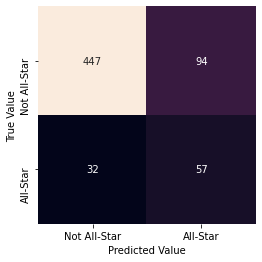

In [16]:
conf_mat = sklmetrics.confusion_matrix(merged_y_test, merged_y_pred)
print(conf_mat)


sns.heatmap(conf_mat, fmt='d',square=True, annot=True, cbar = False, xticklabels = ['Not All-Star','All-Star'], 
                                                            yticklabels = ['Not All-Star','All-Star'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

I define a function to plot the feature importance for decision trees. 

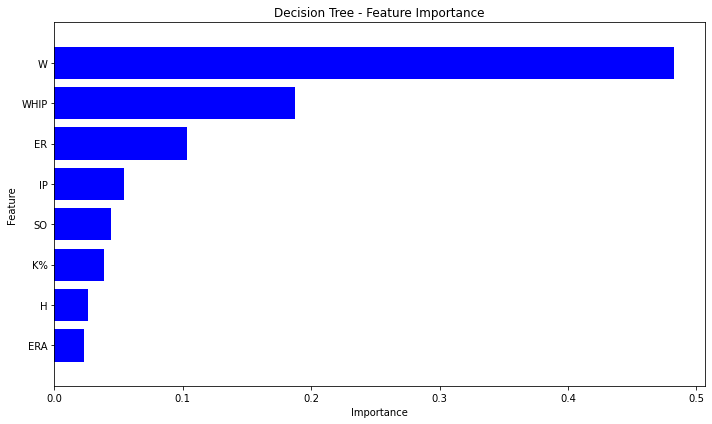

In [17]:
def plot_feature_importance(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.feature_importances_)), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    imp_features = imp_features.iloc[10:]
    plt.figure(figsize=(10,6))
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

plot_feature_importance(best_dec_tree_cv, merged_x.columns, cls_nm='Decision Tree')

In [28]:
importances = best_dec_tree_cv.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(merged_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.482632)
2. feature 14 (0.187015)
3. feature 6 (0.103447)
4. feature 13 (0.054246)
5. feature 9 (0.044405)
6. feature 15 (0.038876)
7. feature 5 (0.025949)
8. feature 10 (0.022969)
9. feature 17 (0.015018)
10. feature 8 (0.012167)
11. feature 12 (0.005066)
12. feature 11 (0.004836)
13. feature 16 (0.003375)
14. feature 7 (0.000000)
15. feature 4 (0.000000)
16. feature 3 (0.000000)
17. feature 2 (0.000000)
18. feature 1 (0.000000)


Time to read in pitching statistics from the 2020 season. 

In [31]:
pitching_2020 = pd.read_csv('./Data/pitching_2020.csv', encoding = 'Latin-1')

In [34]:
pitching_2020 = pitching_2020.iloc[:805]
pitching_2020

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,K%,BB%,K%-BB%
0,1.0,Albert Abreu,24.0,NYY,AL,0.0,1.0,0.000,20.25,2.0,...,16.69,4.500,27.0,6.8,13.5,13.5,1.00,0.181818,0.181818,0.000000
1,2.0,Bryan Abreu,23.0,HOU,AL,0.0,0.0,NaN,2.70,4.0,...,9.49,2.400,2.7,0.0,18.9,8.1,0.43,0.150000,0.350000,-0.200000
2,3.0,Jason Adam,28.0,CHC,NL,2.0,1.0,0.667,3.29,13.0,...,3.78,1.244,5.9,1.3,5.3,13.8,2.63,0.362069,0.137931,0.224138
3,4.0,Austin Adams,29.0,SDP,NL,0.0,0.0,NaN,4.50,3.0,...,4.44,1.250,6.8,2.3,4.5,15.8,3.50,0.411765,0.117647,0.294118
4,5.0,Chance Adams,25.0,KCR,AL,0.0,0.0,NaN,9.35,6.0,...,3.31,1.731,15.6,1.0,0.0,6.2,NaN,0.150000,0.000000,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,801.0,T.J. Zeuch,24.0,TOR,AL,1.0,0.0,1.000,1.59,3.0,...,4.87,1.147,7.1,0.8,3.2,2.4,0.75,0.063830,0.085106,-0.021277
801,802.0,Kyle Zimmer,28.0,KCR,AL,1.0,0.0,1.000,1.57,16.0,...,2.36,1.043,5.5,0.0,3.9,10.2,2.60,0.285714,0.109890,0.175824
802,803.0,Bruce Zimmermann,25.0,BAL,AL,0.0,0.0,NaN,7.71,2.0,...,6.62,1.143,7.7,2.6,2.6,9.0,3.50,0.225806,0.064516,0.161290
803,804.0,Jordan Zimmermann,34.0,DET,AL,0.0,0.0,NaN,7.94,3.0,...,2.13,2.294,17.5,0.0,3.2,9.5,3.00,0.214286,0.071429,0.142857


All-Stars are determined based on an 'All-Star Index', which I calculate based on the feature importances of the best decision tree. 

In [35]:
pitching_2020['All-Star Index'] = (0.482632*pitching_2020['W']) + (0.187015*pitching_2020['WHIP']) - (0.103447*pitching_2020['ER']) + (0.054246*pitching_2020['IP']) + (0.044405*pitching_2020['SO']) + (0.038876*pitching_2020['K%']) - (0.025949*pitching_2020['H']) - (0.022969*pitching_2020['ERA']) + (0.015018*pitching_2020['K%-BB%']) - (0.012167*pitching_2020['BB']) - (0.005066*pitching_2020['R']) + (0.004836*pitching_2020['BFP']) + (0.003375*pitching_2020['K%'])

In [39]:
pitching_2020_sort = pitching_2020.sort_values(by='All-Star Index', ascending = False)
pitching_2020_sort.iloc[:15]

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WHIP,H9,HR9,BB9,SO9,SO/W,K%,BB%,K%-BB%,All-Star Index
65,66.0,Shane Bieber,25.0,CLE,AL,8.0,1.0,0.889,1.63,12.0,...,0.866,5.4,0.8,2.4,14.2,5.81,0.410774,0.070707,0.340067,12.070694
164,165.0,Yu Darvish,33.0,CHC,NL,8.0,3.0,0.727,2.01,12.0,...,0.961,7.0,0.6,1.7,11.0,6.64,0.313131,0.047138,0.265993,10.149372
50,51.0,Trevor Bauer,29.0,CIN,NL,5.0,4.0,0.556,1.73,11.0,...,0.795,5.1,1.1,2.1,12.3,5.88,0.359712,0.061151,0.298561,9.481521
146,147.0,Gerrit Cole,29.0,NYY,AL,7.0,3.0,0.700,2.84,12.0,...,0.959,6.5,1.7,2.1,11.6,5.53,0.326389,0.059028,0.267361,8.938942
175,176.0,Jacob deGrom,32.0,NYM,NL,4.0,2.0,0.667,2.38,12.0,...,0.956,6.2,0.9,2.4,13.8,5.78,0.388060,0.067164,0.320896,8.271718
443,444.0,Kenta Maeda,32.0,MIN,AL,6.0,1.0,0.857,2.70,11.0,...,0.750,5.4,1.2,1.4,10.8,8.00,0.322581,0.040323,0.282258,8.004828
441,442.0,Lance Lynn,33.0,TEX,AL,6.0,3.0,0.667,3.32,13.0,...,1.060,6.9,1.4,2.7,9.5,3.56,0.258721,0.072674,0.186047,7.859777
410,411.0,Dinelson Lamet,27.0,SDP,NL,3.0,1.0,0.750,2.09,12.0,...,0.855,5.1,0.7,2.6,12.1,4.65,0.348315,0.074906,0.273408,7.740771
103,104.0,Corbin Burnes,25.0,MIL,NL,4.0,1.0,0.800,2.11,12.0,...,1.022,5.6,0.3,3.6,13.3,3.67,0.366667,0.100000,0.266667,7.595964
521,522.0,Aaron Nola,27.0,PHI,NL,5.0,5.0,0.500,3.28,12.0,...,1.079,6.8,1.1,2.9,12.1,4.17,0.332180,0.079585,0.252595,7.547059


Shane Bieber and Yu Darvish should square off as the AL and NL starters, respectively. A handful of the other top pitchers according to All-Star Index serve as relievers in what would have been an exciting matchup. 

To see which features are most important in classifying non-Allstars, I also include a Logistic Regression model and follow the same steps as above. 

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
params = {'penalty': ['l1', 'l2'],
         'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

model = LogisticRegression(class_weight='balanced', max_iter = 700)

grid_search_log_reg = GridSearchCV(model, 
                                    param_grid=params,  
                                   cv=10, 
                                   n_jobs = 2  
                                   )

grid_search_log_reg.fit(merged_x_train, merged_y_train)

best_log_reg = grid_search_log_reg.best_estimator_

print(grid_search_log_reg.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [20]:
merged_pred_Y = best_log_reg.predict(merged_x_test)

print('The accuracy score is {}'.format(sklmetrics.accuracy_score(merged_y_test, merged_pred_Y)))

The accuracy score is 0.8095238095238095


[[446  95]
 [ 25  64]]


Text(91.68, 0.5, 'True Value')

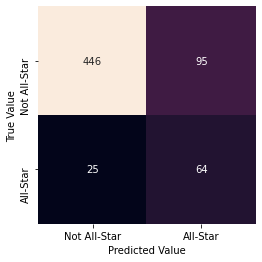

In [21]:
conf_mat = sklmetrics.confusion_matrix(merged_y_test, merged_pred_Y)
print(conf_mat)

sns.heatmap(conf_mat, fmt='d',square=True, annot=True, cbar = False, xticklabels = ['Not All-Star','All-Star'], 
                                                            yticklabels = ['Not All-Star','All-Star'])
plt.xlabel("Predicted Value")
plt.ylabel("True Value")

In [22]:
def plot_feature_importance_coeff(model, Xnames, cls_nm = None):

    imp_features = pd.DataFrame(np.column_stack((Xnames, model.coef_.ravel())), columns = ['feature', 'importance'])
    imp_features[['importance']] = imp_features[['importance']].astype(float)
    imp_features[['abs_importance']] = imp_features[['importance']].abs()
    imp_features = imp_features.sort_values(by = ['abs_importance'], ascending = [1])
    plt.figure(figsize=(10,6))
    plt.title(cls_nm + " - Feature Importance")
    plt.barh(range(imp_features.shape[0]), imp_features['importance'],
            color="b", align="center")
    plt.yticks(range(imp_features.shape[0]), imp_features['feature'], )
    plt.ylim([-1, imp_features.shape[0]])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout() 
    plt.savefig(cls_nm + "_feature_imp.png", bbox_inches='tight')
    plt.show()

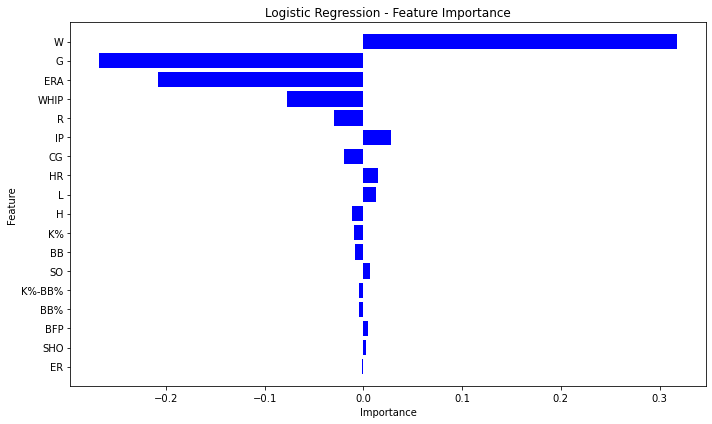

In [23]:
plot_feature_importance_coeff(best_log_reg, merged_x_train.columns, cls_nm="Logistic Regression")

Your favorite pitcher wasn't venerated as a 2020 'What Could Have Been' All-Star? It's likely he did not pitch many games, or his ERA and WHIP were relatively high compared to the All-Star starters. 

Who were this year's snubs? Which metrics should have been included in the analysis? Will we have a 2021 All-Star game?!